In [11]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 회귀모델
from sklearn.neighbors import KNeighborsRegressor
# 선형회귀
from sklearn.linear_model import LinearRegression
# 다중회귀
from sklearn.preprocessing import PolynomialFeatures
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn import datasets

# 표준화
from sklearn.preprocessing import StandardScaler
# Lasso (L1)
from sklearn.linear_model import Lasso
# Ridge (L2)
from sklearn.linear_model import Ridge
# 확률적 경사하강법
from sklearn.linear_model import SGDClassifier

# Cluster
from sklearn.cluster import KMeans
# Voting
from sklearn.ensemble import VotingClassifier
# 정확도 측정
from sklearn.metrics import accuracy_score
# Sigmoid
from scipy.special import expit
# SoftMax
from scipy.special import softmax

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 확률적 경사 하강법(SGD: Stochasctic Gradient Descent)
- 머신러닝에서도 많이 사용하지만 실질적으로 딥러닝에서 많이 사용한다.
- 데이터가 추가 되었을 경우의 머신러닝 처리 방법
1. 새로운 데이터로 모델을 추가하여 새롭게 학습하여 처리한다.
2. 추가된 개수만큼 기존의 데이터를 버리고 사용한다.
3. 기존 모델을 수정하면서 사용한다.(점진적 학습방법)

- Epoch : 훈련세트를 다 사용했을 경우의 단계
- mini batch 경사하강법중 mini batch의 개수 : Hyper Parameter, 보통 2의 배수

### 손실함수
- 머신러닝 알고리즘이 에러율을 측정하는 함수
- 손실함수 값이 적은것이 정확도가 높은 것

In [5]:
fish = pd.read_csv('../Data/fishes.csv')

In [6]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
# Feature
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [8]:
# Target
fish_target = fish['Species'].to_numpy()

In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [10]:
# 표준화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
# 확률적 경사하강법의 분류 알고리즘 적용
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

In [14]:
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [15]:
print('Train :', sc.score(train_scaled, train_target))
print('Test :', sc.score(test_scaled, test_target))

Train : 0.773109243697479
Test : 0.775


> score가 별로 않좋고, 과소적합.

In [18]:
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [22]:
print('Train :', sc.score(train_scaled, train_target))
print('Test :', sc.score(test_scaled, test_target))

Train : 0.7815126050420168
Test : 0.8


---
### Epoch와 과대/과서 적합
- 규제 값이 작아지면 과대적합이 된다.
- 조기종료(Early Stopping): 적합한 Epoch의 위치를 찾으면 종료한다.

In [23]:
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [24]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

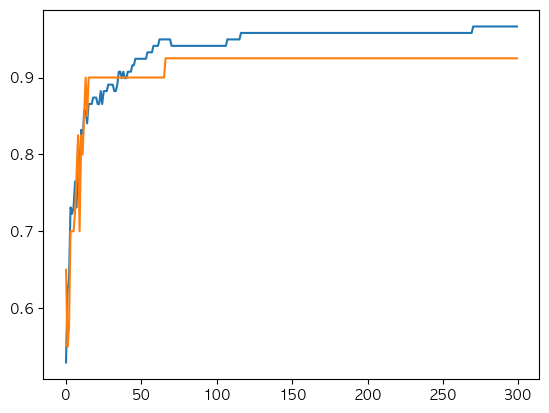

In [25]:
plt.plot(train_score)
plt.plot(test_score)

plt.show()

> 100정도의 Epoch가 좋은 것 같다

In [26]:
# 새롭게
sc = SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)
# tol=None : 조기종료 시점, 현재는 정지기준이 없고 반복기간동안의 최적의 손실값보다 큰 경우 조기종료 한다.
sc.fit(train_scaled, train_target)
print('Train :', sc.score(train_scaled, train_target))
print('Test :', sc.score(test_scaled, test_target))

Train : 0.957983193277311
Test : 0.925


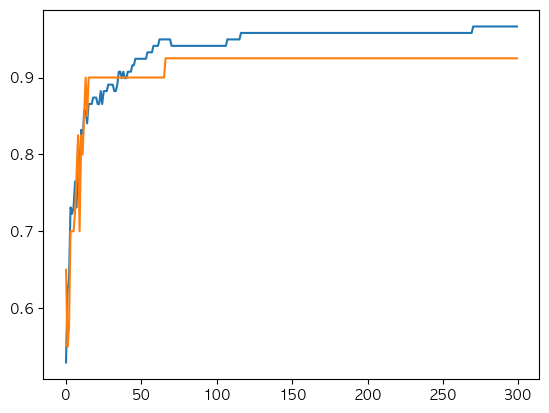

In [27]:
plt.plot(train_score)
plt.plot(test_score)

plt.show()

---
### SVM을 이용하는 확률적 경사 하강법

In [31]:
# 조기종류가 없는 경우
sc = SGDClassifier(loss='hinge', max_iter=100, random_state=42, tol=None)
sc.fit(train_scaled, train_target)
print('Train :', sc.score(train_scaled, train_target))
print('Test :', sc.score(test_scaled, test_target))

Train : 0.9495798319327731
Test : 0.925


In [30]:
# 조기종료 시점 적용
sc = SGDClassifier(loss='hinge', max_iter=100, random_state=42, tol=0.0001)
sc.fit(train_scaled, train_target)
print('Train :', sc.score(train_scaled, train_target))
print('Test :', sc.score(test_scaled, test_target))

Train : 0.907563025210084
Test : 0.925
